# Backpropagation in Neural Networks: Main Ideas


Backpropagation is a key algorithm for training neural networks by optimizing parameters such as weights and biases.
This notebook explains the main ideas of backpropagation using the chain rule and gradient descent. The concepts
are broken down step-by-step, with accompanying examples and mathematical notations.



## Prerequisites

Before diving into backpropagation, ensure you are familiar with:
1. Neural Networks
2. The Chain Rule in calculus
3. Gradient Descent

If not, review the necessary resources or tutorials.



## Simple Example of a Neural Network

Consider a neural network with a single hidden layer designed to predict whether drug dosages (low, medium, high) are effective.

### Neural Network Workflow
1. Input features (e.g., dosage levels) pass through the network.
2. Activation functions, weights, and biases adjust the input to produce an output prediction.
3. Backpropagation calculates how weights and biases should be updated to minimize prediction error.



## Backpropagation Process

The goal of backpropagation is to minimize the error between the predicted values and the actual values in the dataset.

### Steps:
1. **Forward Pass:** Calculate predictions using the current parameters.
2. **Error Calculation:** Compute the loss (e.g., sum of squared residuals).
3. **Backward Pass:** Use the chain rule to calculate the gradient of the loss function with respect to each parameter.
4. **Parameter Update:** Adjust weights and biases using gradient descent.

Mathematically, the process involves:
$$
L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where:
- $L$: Loss function (sum of squared residuals)
- $y_i$: Observed values
- $\hat{y}_i$: Predicted values
- $n$: Number of observations



## Using the Chain Rule

To compute gradients, we apply the chain rule. For a parameter $b_3$, the gradient is:
$$
\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b_3}
$$

### Example:
Given a loss function:
$$
L = \sum_{i=1}^{3} (y_i - \hat{y}_i)^2
$$

1. Compute $\frac{\partial L}{\partial \hat{y}}$:
$$
\frac{\partial L}{\partial \hat{y}} = -2 (y_i - \hat{y}_i)
$$

2. Compute $\frac{\partial \hat{y}}{\partial b_3}$:
For a simple network, $\hat{y} = f(x; b_3)$, where $b_3$ is added directly, so:
$$
\frac{\partial \hat{y}}{\partial b_3} = 1
$$

Thus:
$$
\frac{\partial L}{\partial b_3} = -2 (y_i - \hat{y}_i)
$$



## Gradient Descent

Gradient descent updates parameters iteratively to minimize the loss function.

The update rule for a parameter $b_3$:
$$
b_3 \leftarrow b_3 - \alpha \frac{\partial L}{\partial b_3}
$$
where:
- $\alpha$: Learning rate (step size)
- $\frac{\partial L}{\partial b_3}$: Gradient

### Example Update:
Given $\frac{\partial L}{\partial b_3} = -15.7$ and $\alpha = 0.1$:
$$
b_3 \leftarrow 0 - (0.1)(-15.7) = 1.57
$$



## Iterative Optimization

Backpropagation uses the gradient descent process repeatedly:
1. Compute gradients for all parameters (weights and biases).
2. Update parameters using the gradient descent rule.
3. Repeat until convergence (i.e., minimal loss).

In practice, this is implemented efficiently for large networks using frameworks such as TensorFlow or PyTorch.



## Conclusion

Backpropagation combines the chain rule and gradient descent to optimize neural network parameters. By iteratively
minimizing the loss function, it ensures that the model learns to make accurate predictions.

Understanding these concepts is crucial for designing and training deep learning models.



## Example: Neural Network Implementation

Below is a simple implementation of a neural network in Python using NumPy. This example demonstrates the forward and backward passes with gradient descent.

### Code Example


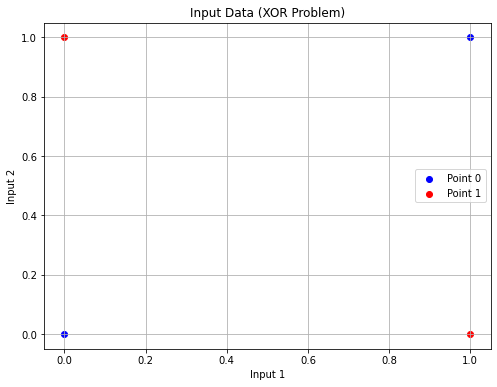

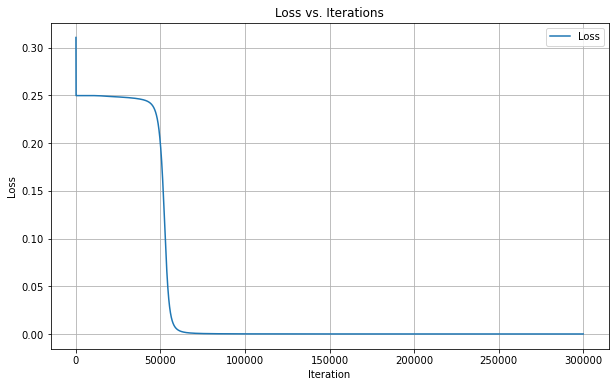

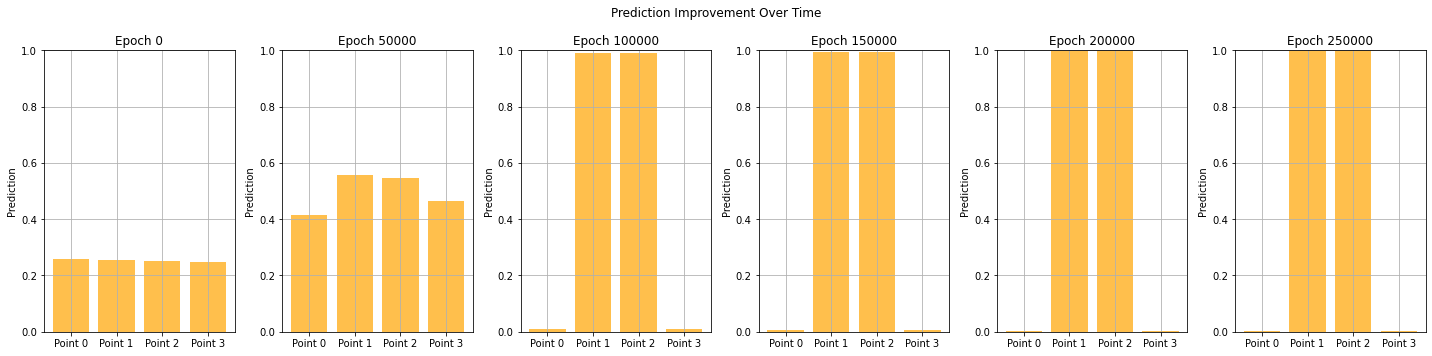

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data for XOR problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Sigmoid activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss function (Mean Squared Error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network Class
class SimpleNeuralNetwork:
    def __init__(self):
        self.weights_input_hidden = np.random.randn(2, 2)
        self.bias_hidden = np.random.randn(2)
        self.weights_hidden_output = np.random.randn(2, 1)
        self.bias_output = np.random.randn(1)
    
    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        return self.output_layer
    
    def backward(self, X, y_true, learning_rate):
        loss_gradient = self.output_layer - y_true
        d_output = loss_gradient * sigmoid_derivative(self.output_layer)
        
        hidden_output_gradient = np.dot(self.hidden_layer.T, d_output)
        bias_output_gradient = np.sum(d_output, axis=0)
        
        hidden_error = np.dot(d_output, self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_layer)
        input_hidden_gradient = np.dot(X.T, hidden_error)
        bias_hidden_gradient = np.sum(hidden_error, axis=0)
        
        self.weights_hidden_output -= learning_rate * hidden_output_gradient
        self.bias_output -= learning_rate * bias_output_gradient
        self.weights_input_hidden -= learning_rate * input_hidden_gradient
        self.bias_hidden -= learning_rate * bias_hidden_gradient

# Initialize and train the neural network
nn = SimpleNeuralNetwork()
epochs = 300000
learning_rate = 0.1
losses = []
predictions = []

# Train and record data for plotting
for epoch in range(epochs):
    y_pred = nn.forward(X)
    nn.backward(X, y, learning_rate)
    losses.append(mse_loss(y, y_pred))
    if epoch % 50000 == 0:
        predictions.append((epoch, y_pred))

# Plot the input data
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    color = 'blue' if y[i] == 0 else 'red'
    plt.scatter(X[i, 0], X[i, 1], c=color, label=f"Point {i}" if i < 2 else None)
plt.title("Input Data (XOR Problem)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss")
plt.title("Loss vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot predictions evolution
fig, axes = plt.subplots(1, len(predictions), figsize=(20, 5))
for i, (epoch, pred) in enumerate(predictions):
    axes[i].bar(range(len(pred)), pred.flatten(), color='orange', alpha=0.7)
    axes[i].set_title(f"Epoch {epoch}")
    axes[i].set_ylim(0, 1)
    axes[i].set_xticks(range(len(pred)))
    axes[i].set_xticklabels([f"Point {j}" for j in range(len(pred))])
    axes[i].set_ylabel("Prediction")
    axes[i].grid()
plt.suptitle("Prediction Improvement Over Time")
plt.tight_layout()
plt.show()


In [3]:
# Ensure the number of PCA points matches the number of losses
weights_flat = []
losses_subset = []

# Extract weights and corresponding losses at intervals
for epoch_idx, (epoch, _) in enumerate(predictions):
    weights = np.concatenate([
        nn.weights_input_hidden.flatten(),
        nn.weights_hidden_output.flatten(),
        nn.bias_hidden.flatten(),
        nn.bias_output.flatten()
    ])
    weights_flat.append(weights)
    losses_subset.append(losses[epoch])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
weights_pca = pca.fit_transform(weights_flat)

# Plot the loss landscape in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    weights_pca[:, 0], weights_pca[:, 1], weights_pca[:, 2],
    c=losses_subset, cmap='viridis', s=50, marker='o'
)
ax.set_title("Loss Landscape with PCA-Reduced Weights")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label("Loss")
plt.show()


NameError: name 'PCA' is not defined

In [ ]:
# Match the number of losses to the number of PCA-transformed points
weights_pca = weights_pca[:len(losses_subset)]

# Plot the corrected loss landscape in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    weights_pca[:, 0], weights_pca[:, 1], weights_pca[:, 2],
    c=losses_subset, cmap='viridis', s=50, marker='o'
)
ax.set_title("Loss Landscape with PCA-Reduced Weights")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label("Loss")
plt.show()


In [1]:
# Re-train the neural network and record weights and losses for the entire learning process
class SimpleNeuralNetwork:
    def __init__(self):
        self.weights_input_hidden = np.random.randn(2, 2)
        self.bias_hidden = np.random.randn(2)
        self.weights_hidden_output = np.random.randn(2, 1)
        self.bias_output = np.random.randn(1)
    
    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        return self.output_layer
    
    def backward(self, X, y_true, learning_rate):
        loss_gradient = self.output_layer - y_true
        d_output = loss_gradient * sigmoid_derivative(self.output_layer)
        
        hidden_output_gradient = np.dot(self.hidden_layer.T, d_output)
        bias_output_gradient = np.sum(d_output, axis=0)
        
        hidden_error = np.dot(d_output, self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_layer)
        input_hidden_gradient = np.dot(X.T, hidden_error)
        bias_hidden_gradient = np.sum(hidden_error, axis=0)
        
        self.weights_hidden_output -= learning_rate * hidden_output_gradient
        self.bias_output -= learning_rate * bias_output_gradient
        self.weights_input_hidden -= learning_rate * input_hidden_gradient
        self.bias_hidden -= learning_rate * bias_hidden_gradient

# Initialize the network
nn = SimpleNeuralNetwork()

# Set up training variables
epochs = 100000
learning_rate = 0.1

# Collect weights and losses
weights_flat = []
losses = []

for epoch in range(epochs):
    y_pred = nn.forward(X)
    nn.backward(X, y, learning_rate)
    
    # Record the current weights and loss
    weights = np.concatenate([
        nn.weights_input_hidden.flatten(),
        nn.weights_hidden_output.flatten(),
        nn.bias_hidden.flatten(),
        nn.bias_output.flatten()
    ])
    weights_flat.append(weights)
    losses.append(mse_loss(y, y_pred))

# Perform PCA on the recorded weights
pca = PCA(n_components=3)
weights_pca = pca.fit_transform(weights_flat)

# Use iteration indices as colors
iterations = np.arange(len(weights_pca))

# Plot the 3D loss landscape
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    weights_pca[:, 0], weights_pca[:, 1], weights_pca[:, 2],
    c=iterations, cmap='viridis', s=50, marker='o'
)
ax.set_title("Loss Landscape with PCA-Reduced Weights")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label("Loss")
plt.show()


NameError: name 'np' is not defined

In [17]:
%matplotlib qt

In [14]:
weights_pca.shape

(6, 3)